#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 6 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_auc_score

#**Question-1**

##**1.** From the given link, download “anneal.data”, “anneal.names” and “anneal.test”, convert them into a readable format (Ex: txt, csv, etc....) and do meaningful Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-6/anneal.data', sep=",", header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [3]:
dataset.describe()

,3,4,8,32,33,34,36
count,798.000000,798.000000,798.00000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,30.85213,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,115.55127,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.00000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.00000,4.000000,1525.000000,4880.000000,600.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       798 non-null    object 
 1   1       798 non-null    object 
 2   2       798 non-null    object 
 3   3       798 non-null    int64  
 4   4       798 non-null    int64  
 5   5       798 non-null    object 
 6   6       798 non-null    object 
 7   7       798 non-null    object 
 8   8       798 non-null    int64  
 9   9       798 non-null    object 
 10  10      798 non-null    object 
 11  11      798 non-null    object 
 12  12      798 non-null    object 
 13  13      798 non-null    object 
 14  14      798 non-null    object 
 15  15      798 non-null    object 
 16  16      798 non-null    object 
 17  17      798 non-null    object 
 18  18      798 non-null    object 
 19  19      798 non-null    object 
 20  20      798 non-null    object 
 21  21      798 non-null    object 
 22  22


Plot density v/s feature 3



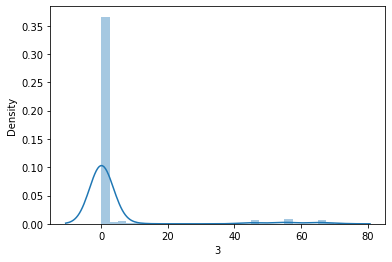


Plot density v/s feature 4



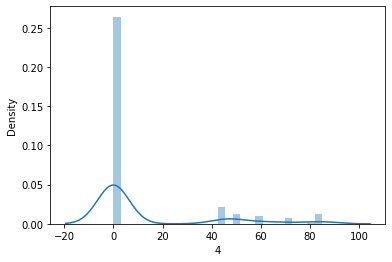


Plot density v/s feature 8



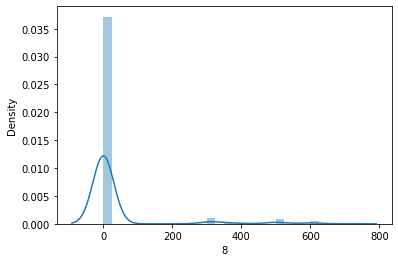


Plot density v/s feature 32



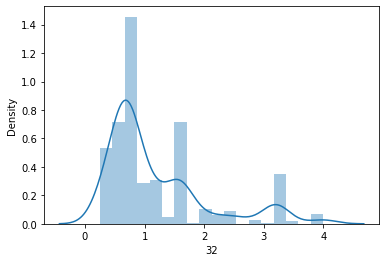


Plot density v/s feature 33



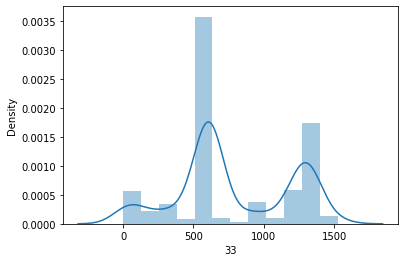


Plot density v/s feature 34



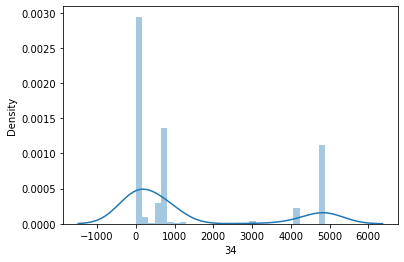


Plot density v/s feature 36



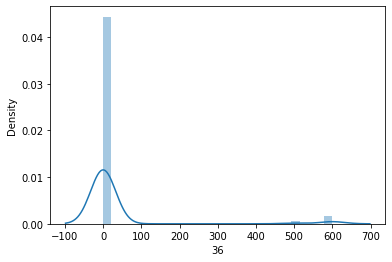

In [5]:
# Plotting the distribution.

for i in dataset.columns:
    if(dataset[i].dtype != 'object'):
        print(f"\nPlot density v/s feature {i}\n")
        sns.distplot(dataset[i])
        plt.show()

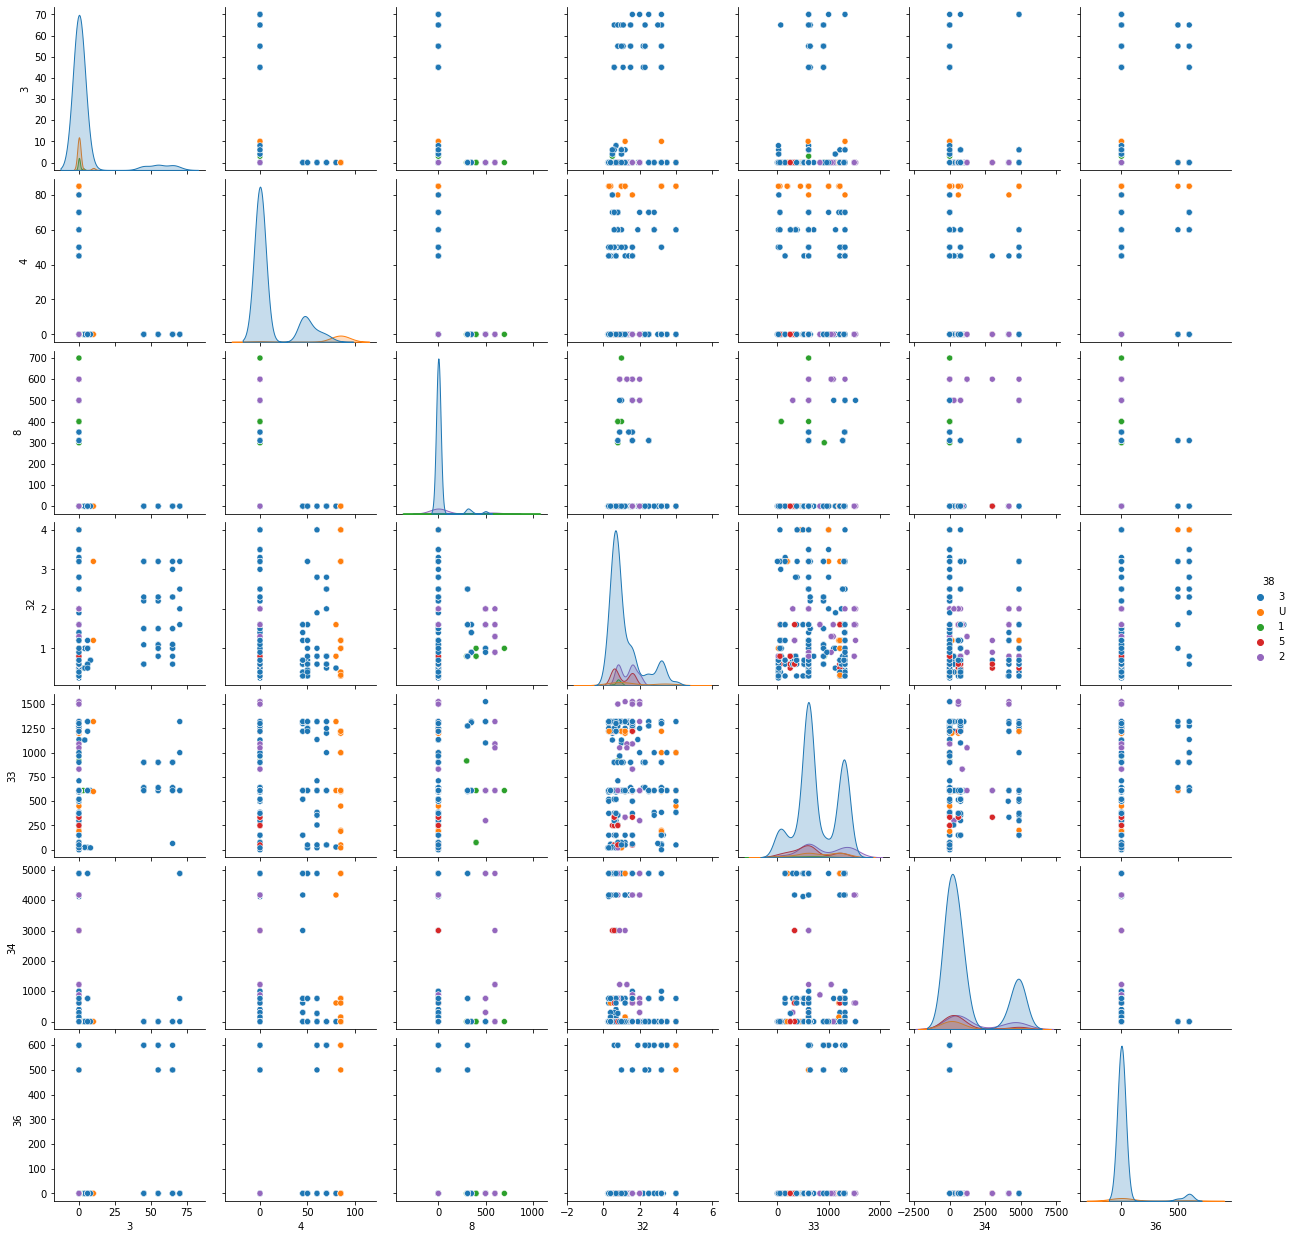

In [6]:
sns.pairplot(dataset, hue=38)

In [7]:
testDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-6/anneal.test', sep = ',', header = None)
testDataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
96,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
97,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
98,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


##**2.** Preprocess the data (If any discrepancies/errors, handle them as well) and split the data into [65:35].

In [8]:
columnsThatContainsMissingValues = []
index = 0
for i in dataset.columns:
    cnt = 0
    for j in dataset[i]:
        if(j == '?'):
            cnt += 1
    if(cnt >= 600):
        columnsThatContainsMissingValues.append(index)
    index += 1

print(columnsThatContainsMissingValues)
print(len(columnsThatContainsMissingValues))

[0, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 37]
25


In [9]:
columnsThatContainsMissingValues = columnsThatContainsMissingValues + [1]
print(columnsThatContainsMissingValues)

[0, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 37, 1]


In [10]:
dataset.drop(columnsThatContainsMissingValues, axis = 1, inplace = True)
testDataset.drop(columnsThatContainsMissingValues, axis = 1, inplace = True)

In [11]:
dataset

,2,3,4,6,7,8,11,31,32,33,34,36,38
0,A,8,0,S,?,0,G,COIL,0.700,610.0,0,0,3
1,R,0,0,S,2,0,E,COIL,3.200,610.0,0,0,3
2,R,0,0,S,2,0,E,SHEET,0.700,1300.0,762,0,3
3,A,0,60,?,?,0,G,COIL,2.801,385.1,0,0,3
4,A,0,60,?,?,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,A,0,50,?,?,0,G,COIL,1.001,50.0,0,0,3
794,?,0,0,S,1,0,G,SHEET,0.699,1300.0,4880,0,3
795,A,0,0,S,2,0,E,COIL,0.400,609.9,0,0,3
796,A,0,0,S,2,0,G,SHEET,3.200,610.0,4880,0,3


In [12]:
categoricalData = []
notcategoricalData = []
for i in dataset.columns:
    if (dataset[i].dtype == 'object' and i != 38):
        categoricalData.append(i)
    else:
        notcategoricalData.append(i)

In [13]:
for i in categoricalData:
    print(dataset[i].unique())

['A' 'R' 'K' 'S' '?' 'W' 'M' 'V']
['S' '?' 'A']
['?' '2' '3' '1' '5']
['G' 'E' 'D' 'F' '?']
['COIL' 'SHEET']


In [14]:
#Encoding the categorical columns.

categorical_columns = categoricalData
for column in categorical_columns:
    tempdf = pd.get_dummies(dataset[column], prefix=column)
    dataset = pd.merge(left=dataset, right=tempdf, left_index=True, right_index=True)
    dataset = dataset.drop(columns=column)

In [15]:
categorical_columns = categoricalData
for column in categorical_columns:
    tempdf = pd.get_dummies(testDataset[column], prefix=column)
    testDataset = pd.merge(left=testDataset, right=tempdf, left_index=True, right_index=True)
    testDataset = testDataset.drop(columns=column)

In [16]:
dataset

,3,4,8,32,33,34,36,38,2_?,2_A,...,7_3,7_5,7_?,11_?,11_D,11_E,11_F,11_G,31_COIL,31_SHEET
0,8,0,0,0.700,610.0,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,3.200,610.0,0,0,3,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0.700,1300.0,762,0,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,60,0,2.801,385.1,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
4,0,60,0,0.801,255.0,269,0,3,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,50,0,1.001,50.0,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
794,0,0,0,0.699,1300.0,4880,0,3,1,0,...,0,0,0,0,0,0,0,1,0,1
795,0,0,0,0.400,609.9,0,0,3,0,1,...,0,0,0,0,0,1,0,0,1,0
796,0,0,0,3.200,610.0,4880,0,3,0,1,...,0,0,0,0,0,0,0,1,0,1


In [17]:
print(dataset.shape)

(798, 31)


In [18]:
print(testDataset.shape)

(100, 31)


In [19]:
categoricalData

[2, 6, 7, 11, 31]

In [20]:
notcategoricalData

[3, 4, 8, 32, 33, 34, 36, 38]

In [21]:
dataset

,3,4,8,32,33,34,36,38,2_?,2_A,...,7_3,7_5,7_?,11_?,11_D,11_E,11_F,11_G,31_COIL,31_SHEET
0,8,0,0,0.700,610.0,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,3.200,610.0,0,0,3,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0.700,1300.0,762,0,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,60,0,2.801,385.1,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
4,0,60,0,0.801,255.0,269,0,3,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,50,0,1.001,50.0,0,0,3,0,1,...,0,0,1,0,0,0,0,1,1,0
794,0,0,0,0.699,1300.0,4880,0,3,1,0,...,0,0,0,0,0,0,0,1,0,1
795,0,0,0,0.400,609.9,0,0,3,0,1,...,0,0,0,0,0,1,0,0,1,0
796,0,0,0,3.200,610.0,4880,0,3,0,1,...,0,0,0,0,0,0,0,1,0,1


In [22]:
testDataset[38].unique()

array(['3', 'U', '5', '2'], dtype=object)

In [23]:
dataset[38].unique()

array(['3', 'U', '1', '5', '2'], dtype=object)

In [24]:
Label_Encode = LabelEncoder()
dataset[38] = Label_Encode.fit_transform(dataset[38])
testDataset[38] = Label_Encode.fit_transform(testDataset[38])+1

In [25]:
dataset[38].unique()

array([2, 4, 0, 3, 1])

In [26]:
testDataset[38].unique()

array([2, 4, 3, 1])

In [27]:
target = 38
X = dataset.iloc[:,dataset.columns != target]
y = dataset.iloc[:,dataset.columns.get_loc(target)]
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.65, random_state=42)
y_train_pca = y_train

In [28]:
target = 38
x_test = testDataset.iloc[:,testDataset.columns != target]
y_test = testDataset.iloc[:,testDataset.columns.get_loc(target)]

In [29]:
x_train

,3,4,8,32,33,34,36,2_?,2_A,2_K,...,7_3,7_5,7_?,11_?,11_D,11_E,11_F,11_G,31_COIL,31_SHEET
467,4,0,0,0.500,25.0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
319,0,0,0,0.700,1320.0,762,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
328,0,0,0,4.000,610.0,0,600,0,0,0,...,0,0,0,0,0,1,0,0,1,0
443,0,0,0,0.500,610.0,762,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
493,0,0,310,2.501,1275.0,4880,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,3.500,610.0,0,600,0,0,0,...,0,0,0,0,0,1,0,0,1,0
106,0,45,0,1.600,610.0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
270,0,0,0,0.321,610.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
435,0,0,0,0.699,1220.0,4880,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


##**3.** Train 2-3 Classification Models (studied and implemented so far) with the proper reasoning of choosing them and show 5-Fold Cross-Validation Plots as well for comparison.

###Decision Tree Classifier

In [30]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(x_train,y_train)
Pred = DTC.predict(x_val)
accValDTPCA = accuracy_score(y_val, Pred)*100
classificationReportBeforePCADT = classification_report(y_val, Pred)
print(f"Accuracy with Decision Tree as classifier: {accValDTPCA}")

Accuracy with Decision Tree as classifier: 99.28571428571429


In [31]:
kf = KFold(5)
results = cvs(DTC, x_train, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.96153846 0.97115385 0.98076923 0.97087379 0.99029126]
97.49253174010455


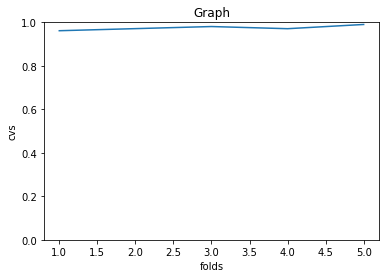

In [32]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

###XGBoost Classifier

In [33]:
import xgboost as xgb
clf = xgb.XGBClassifier(subsample=0.7, max_depth=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
accXGBPCA = accuracy_score(y_val, y_pred)*100
classificationReportBeforePCAXGB = classification_report(y_val, Pred)
print(f"Accuracy with XG Boost as classifier: {accXGBPCA}")

Accuracy with XG Boost as classifier: 98.57142857142858


In [34]:
kf = KFold(5)
results = cvs(clf, x_train, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.98076923 0.98076923 0.99038462 0.98058252 0.99029126]
98.45593726661687


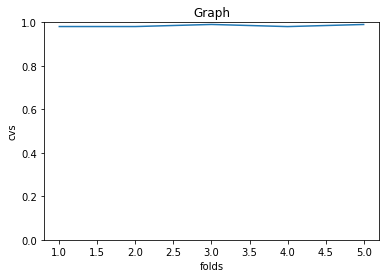

In [35]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

###Gaussian Naive Bayes Algorithm

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
Pred = gnb.predict(x_val)
accGNBPCA = accuracy_score(y_val, Pred)*100
classificationReportBeforePCAGNB = classification_report(y_val, Pred)
print(f"Accuracy with Gaussian Naive Bayes as classifier: {accGNBPCA}")

Accuracy with Gaussian Naive Bayes as classifier: 86.07142857142858


In [37]:
kf = KFold(5)
results = cvs(gnb, x_train, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.89423077 0.93269231 0.94230769 0.9223301  0.88349515]
91.50112023898431


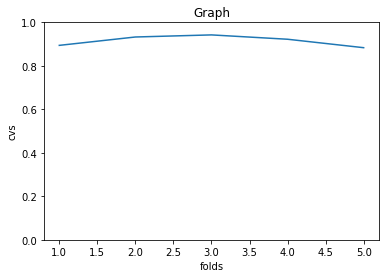

In [38]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

##**4.** Implement Principal Component Analysis from scratch, with sub-tasks as following:-

###**a.** Centralize the Data via feature-wise means and standard deviations. Write the code for deriving the covariance matrix from scratch.

In [39]:
mean_ = x_train.mean(axis =0)
std_ = x_train.std(axis=0)

x_train_cen = (x_train-mean_)/std_
x_train_cen

,3,4,8,32,33,34,36,2_?,2_A,2_K,...,7_3,7_5,7_?,11_?,11_D,11_E,11_F,11_G,31_COIL,31_SHEET
467,0.004112,-0.479962,-0.289152,-0.825232,-1.908577,-0.636744,-0.224324,-0.300585,1.010674,-0.264787,...,-0.433255,-0.108149,1.264880,-0.622888,-0.273029,-0.722855,-0.252056,1.743844,0.999034,-0.999034
319,-0.279897,-0.479962,-0.289152,-0.596080,1.330553,-0.214906,-0.224324,-0.300585,-0.987529,-0.264787,...,-0.433255,-0.108149,-0.789063,1.602326,-0.273029,-0.722855,-0.252056,-0.572339,-0.999034,0.999034
328,-0.279897,-0.479962,-0.289152,3.184913,-0.445340,-0.636744,4.617341,-0.300585,-0.987529,-0.264787,...,-0.433255,-0.108149,-0.789063,-0.622888,-0.273029,1.380733,-0.252056,-0.572339,0.999034,-0.999034
443,-0.279897,-0.479962,-0.289152,-0.825232,-0.445340,-0.214906,-0.224324,-0.300585,1.010674,-0.264787,...,2.303651,-0.108149,-0.789063,1.602326,-0.273029,-0.722855,-0.252056,-0.572339,-0.999034,0.999034
493,-0.279897,-0.479962,2.197837,1.467425,1.217997,2.064788,-0.224324,-0.300585,-0.987529,-0.264787,...,-0.433255,-0.108149,1.264880,-0.622888,-0.273029,-0.722855,-0.252056,1.743844,-0.999034,0.999034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.279897,-0.479962,-0.289152,2.612035,-0.445340,-0.636744,4.617341,-0.300585,-0.987529,-0.264787,...,-0.433255,-0.108149,-0.789063,-0.622888,-0.273029,1.380733,-0.252056,-0.572339,0.999034,-0.999034
106,-0.279897,1.321636,-0.289152,0.435100,-0.445340,-0.636744,-0.224324,-0.300585,1.010674,-0.264787,...,-0.433255,-0.108149,1.264880,-0.622888,3.655549,-0.722855,-0.252056,-0.572339,0.999034,-0.999034
270,-0.279897,-0.479962,-0.289152,-1.030322,-0.445340,-0.636744,-0.224324,-0.300585,-0.987529,-0.264787,...,-0.433255,-0.108149,-0.789063,-0.622888,-0.273029,1.380733,-0.252056,-0.572339,0.999034,-0.999034
435,-0.279897,-0.479962,-0.289152,-0.597226,1.080428,2.064788,-0.224324,-0.300585,1.010674,-0.264787,...,-0.433255,-0.108149,-0.789063,-0.622888,-0.273029,-0.722855,3.959716,-0.572339,-0.999034,0.999034


In [40]:
x_test = (x_test-mean_)/std_
x_val = (x_val-mean_)/std_

In [41]:
x_train_cen.columns

Index([         3,          4,          8,         32,         33,         34,
               36,      '2_?',      '2_A',      '2_K',      '2_M',      '2_R',
            '2_S',      '2_V',      '2_W',      '6_?',      '6_A',      '6_S',
            '7_1',      '7_2',      '7_3',      '7_5',      '7_?',     '11_?',
           '11_D',     '11_E',     '11_F',     '11_G',  '31_COIL', '31_SHEET'],
      dtype='object')

In [42]:
""" Covariance Matrix """

X = x_train_cen.values
N, M = X.shape
cov = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        cov[i, j] = np.sum((X[:, j]) * (X[:, i]))/(N-1)

cov

array([[ 1.00000000e+00, -1.34600022e-01, -8.10894856e-02,
         1.63308397e-01,  5.87713012e-03, -1.68669585e-01,
         2.75651707e-01, -8.42957459e-02, -2.65415406e-01,
         9.61771959e-01, -4.49515035e-02, -1.60721119e-01,
         5.94302933e-02, -2.47153446e-02, -4.31453106e-02,
         3.65085184e-01, -5.90049894e-02, -3.33477249e-01,
        -5.90049894e-02, -2.30415737e-01, -1.21501577e-01,
        -3.03290551e-02,  3.54721113e-01,  4.36518824e-01,
        -7.65677642e-02, -1.99827381e-01, -7.06861944e-02,
        -1.50326872e-01,  2.51080848e-01, -2.51080848e-01],
       [-1.34600022e-01,  1.00000000e+00, -1.39050709e-01,
         1.15397315e-02,  8.60302122e-04, -3.34942730e-02,
         1.07708997e-01,  3.07036839e-02,  3.89313145e-01,
        -1.27333793e-01, -7.70819840e-02, -3.06724606e-01,
        -5.20076874e-02, -4.23814034e-02, -7.39847588e-02,
         3.59051009e-01, -1.01180635e-01, -3.10254966e-01,
        -1.01180635e-01, -3.95112529e-01, -2.08348596e-

###**b.** Make a function Singular_Value_Decomp from scratch in order to compute Eigenvectors, Eigenvalues and Principal Components.

In [43]:
""" Singular Value Decomposition """
# Computes eigenvalues and eigenvectors:

def Singular_Value_Decomp(A):
    PQ = np.eye(A.shape[0])
    X = A.copy()
    for i in range(1000):
            Q, R = QR(X)
            PQ = PQ @ Q;
            X = R @ Q;
    return np.diag(X), PQ

def norm(x):
    return np.sqrt(sum([_x**2 for _x in x]))

def QR(A):
    N, M = A.shape

    # Q of size n*n
    Q = np.empty((N, N))

    # u of size n*n
    u = np.empty((N, N))

    u[:, 0] = -A[:, 0]
    Q[:, 0] = u[:, 0] / norm(u[:, 0])

    for i in range(1, N):
        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j]
        Q[:, i] = u[:, i] / norm(u[:, i])

    R = np.zeros((N, M))
    for i in range(N):
        for j in range(i, M):
            R[i, j] = A[:, j] @ Q[:, i]

    return Q, R

In [44]:
Singular_Value_Decomp(cov)

(array([ 5.38282868e+00,  3.24474116e+00,  2.60800251e+00,  2.44658117e+00,
         2.30225848e+00,  2.04171868e+00,  1.46048802e+00,  1.35740016e+00,
         1.51418827e+00,  1.17985772e+00,  1.08626347e+00,  1.04977447e+00,
         1.02050366e+00,  8.93324295e-01,  8.04275435e-01,  6.20994080e-01,
         5.72125069e-01,  5.23391263e-01,  3.99561353e-01,  3.68988052e-01,
         2.57798157e-01,  1.01178479e-01, -4.06273275e-02,  1.35625763e-02,
         8.44213661e-03, -1.83526218e-03, -2.18637259e-04,  1.86779625e-04,
         5.99301397e-05,  1.86221558e-07]),
 array([[ 2.11993919e-01,  1.92155202e-01, -5.25527174e-01,
          2.79727757e-01, -7.49843607e-02, -6.67606021e-01,
         -4.07867586e-01, -6.24878266e-02, -5.85134022e-01,
         -1.73582878e-01,  1.37352380e-01,  1.06454582e-02,
         -3.74422458e-01, -1.52815696e-02, -1.70625745e-01,
          2.08400964e-01, -6.37432732e-02,  1.64289353e-01,
          4.71178558e-01, -5.07371049e-01,  5.24939836e-02,
    

##**5.** Use the above-made PCA to reduce the data upto a chosen dimension/principal-components and train 2-3 chosen classification models alongside 5-Fold Cross-Validation Plots.

In [45]:
eigen_vals, eigen_vecs = Singular_Value_Decomp(cov)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

5.382828678597081
3.2447411559192876
2.608002506516728
2.446581165893274
2.3022584769953744
2.0417186785350623
1.514188272782608
1.4604880159168152
1.3574001641110587
1.1798577184137835
1.086263468907559
1.0497744685801758
1.020503658236849
0.893324294640957
0.804275434785449
0.6209940795169873
0.5721250692683937
0.5233912625385858
0.39956135309811286
0.3689880515775573
0.2577981566962643
0.10117847940051564
0.04062732750880966
0.013562576291045514
0.0084421366119806
0.0018352621806279204
0.000218637258777402
0.00018677962476837918
5.9930139679108554e-05
1.862215579940081e-07


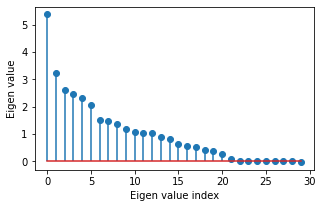

In [46]:
eigen_vals = sorted(eigen_vals, reverse = True)
plt.figure(figsize=(5,3))
plt.stem(eigen_vals[:31], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [47]:
for i in range(31):
    exp_var = np.sum(eigen_vals[:i+1])*100 / np.sum(eigen_vals)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 17.243916344023116 % variance
Eigenvectors upto 2 expresses 27.638459509246754 % variance
Eigenvectors upto 3 expresses 35.993207492624535 % variance
Eigenvectors upto 4 expresses 43.830841471442106 % variance
Eigenvectors upto 5 expresses 51.206137054873764 % variance
Eigenvectors upto 6 expresses 57.74679219975645 % variance
Eigenvectors upto 7 expresses 62.5975012718812 % variance
Eigenvectors upto 8 expresses 67.27618132500184 % variance
Eigenvectors upto 9 expresses 71.62461897236066 % variance
Eigenvectors upto 10 expresses 75.40429858116438 % variance
Eigenvectors upto 11 expresses 78.88414858268668 % variance
Eigenvectors upto 12 expresses 82.24710590441327 % variance
Eigenvectors upto 13 expresses 85.51629405104255 % variance
Eigenvectors upto 14 expresses 88.37806252346716 % variance
Eigenvectors upto 15 expresses 90.95456256519016 % variance
Eigenvectors upto 16 expresses 92.94391994524248 % variance
Eigenvectors upto 17 expresses 94.77672522697

In [48]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[3][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[4][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[5][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[6][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[7][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[8][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[9][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[10][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[11][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[12][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[13][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[14][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[15][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[16][1][:, ].reshape(x_train.shape[1],1))).real
X_train_pca = x_train_cen.dot(W)

In [49]:
X_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
467,2.531692,0.886231,0.013208,-0.419553,-1.339096,1.315382,0.102279,-0.573974,0.566831,-0.527463,0.454985,-0.013516,-0.210887,1.534219,-0.886012,0.275969,-0.262026
319,-2.019632,-2.016905,1.716525,-1.129502,2.164037,-1.176150,0.566537,0.813731,-1.068436,6.373374,3.175657,-8.016851,1.146964,0.511006,-2.640776,0.326798,0.006902
328,-0.778079,-1.784574,-3.464027,2.758787,-0.413072,0.470892,-0.708439,2.328670,0.645655,0.642272,0.159708,1.365036,1.943742,-2.239826,-1.459658,0.053916,-1.525168
443,0.472531,-1.639171,2.763953,-3.283148,0.819929,1.094974,3.666599,0.352244,1.747432,-0.166079,-0.535285,-0.292147,0.212453,-0.066727,0.513678,-0.275057,1.022424
493,2.257535,4.090957,-0.845442,3.252988,4.377626,-0.434110,-4.245856,-0.543106,3.063594,-3.291344,1.832677,-1.743830,-2.043733,-1.014868,-0.834231,0.370628,0.106808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.823213,-1.753055,-3.307484,2.643909,-0.474958,0.476765,-0.583246,2.145878,0.581389,0.612005,0.163603,1.269881,1.802791,-2.056380,-1.320520,-0.003872,-1.797475
106,0.640609,3.315232,-2.409192,-0.179547,-2.047542,-1.562506,-0.113371,-0.682972,-2.158649,0.247118,0.952819,0.252281,-0.559396,-1.540966,-0.745532,1.269171,-0.206722
270,-1.814793,-1.101167,-1.432435,1.526596,-0.915438,0.933899,-0.023835,-0.405643,-1.074699,-0.377208,0.471934,-0.018699,-0.704599,0.801562,0.072056,-0.046829,-0.981189
435,-2.797410,0.784950,0.662520,-1.704152,0.585067,-0.597907,-3.028392,-1.017032,1.871815,1.220501,0.433167,1.141187,0.581086,0.571303,0.913736,-0.258344,-1.135516


In [50]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[3][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[4][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[5][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[6][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[7][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[8][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[9][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[10][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[11][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[12][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[13][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[14][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[15][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[16][1][:, ].reshape(x_train.shape[1],1))).real
X_val_pca = x_val.dot(W)

In [51]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[3][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[4][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[5][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[6][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[7][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[8][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[9][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[10][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[11][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[12][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[13][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[14][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[15][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[16][1][:, ].reshape(x_train.shape[1],1))).real
X_test_pca = x_test.dot(W)

In [52]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train_pca,y_train)
Pred = DTC.predict(X_test_pca)
accAfterPCADT = accuracy_score(y_test, Pred)*100
classificationReportAfterPCADT = classification_report(y_test, Pred)
print(f"Accuracy with Decision Tree as classifier: {accAfterPCADT}")

Accuracy with Decision Tree as classifier: 95.0


In [53]:
kf = KFold(5)
results = cvs(DTC, X_train_pca, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.95192308 0.95192308 0.93269231 0.95145631 0.9223301 ]
94.20649738610905


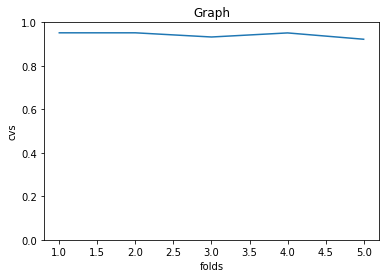

In [54]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

In [55]:
clf = xgb.XGBClassifier(subsample=0.7, max_depth=4)
clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_pca)
accAfterPCAXGB = accuracy_score(y_test, y_pred)*100
classificationReportAfterPCAXGB = classification_report(y_test, y_pred)
print(f"Accuracy with XGBoost as classifier: {accAfterPCAXGB}")

Accuracy with XGBoost as classifier: 97.0


In [56]:
kf = KFold(5)
results = cvs(clf, X_train_pca, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.97115385 0.97115385 0.96153846 0.96116505 0.93203883]
95.94100074682599


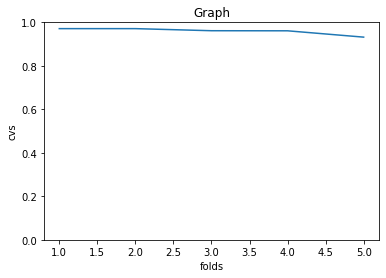

In [57]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

In [58]:
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)
Pred = gnb.predict(X_test_pca)
accAfterPCAGNB = accuracy_score(y_test, Pred)*100
classificationReportAfterPCAGNB = classification_report(y_test, Pred)
print(f"Accuracy with Gaussian Naive Bayes as classifier: {accAfterPCAGNB}")

Accuracy with Gaussian Naive Bayes as classifier: 90.0


In [59]:
kf = KFold(5)
results = cvs(gnb, X_train_pca, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.82692308 0.91346154 0.88461538 0.89320388 0.89320388]
88.22815533980582


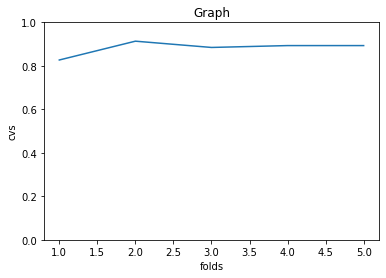

In [60]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

##**6.** Show the Test results of Classification Models on both types of datasets (Before and After PCA), via 2-3 Evaluation Metrics of choice (Ex:- Accuracy, Sensitivity, F1-Score, etc.) with the proper reasonings.

In [61]:
print("Evaluation Metric: Accuracy")
#Before PCA
print(f"The accuracy with Decision Tree Classifier before PCA = {accValDTPCA}")
#After PCA
print(f"The accuracy with Decision Tree Classifier after PCA = {accAfterPCADT}\n")
#Before PCA
print(f"The accuracy with XGBoost Classifier before PCA = {accXGBPCA}")
#After PCA
print(f"The accuracy with XGBoost Classifier after PCA = {accAfterPCAXGB}\n")
#Before PCA
print(f"The accuracy with Gaussian Naive Bayes Classifier before PCA = {accGNBPCA}")
#After PCA
print(f"The accuracy with Gaussian Naive Bayes Classifier after PCA = {accAfterPCAGNB}\n")


print("Evaluation Metric: Classification Report")
#Before PCA
print("The Classification Report with Decision Tree Classifier before PCA")
print(classificationReportBeforePCADT)
#After PCA
print("\nThe Classification Report with Decision Tree Classifier after PCA")
print(classificationReportAfterPCADT)
#Before PCA
print("\nThe Classification Report with XGBoost Classifier before PCA")
print(classificationReportBeforePCAXGB)
#After PCA
print("\nThe Classification Report with XGBoost Classifier after PCA")
print(classificationReportAfterPCAXGB)
#Before PCA
print("\nThe Classification Report with Gaussian Naive Bayes Classifier before PCA")
print(classificationReportBeforePCAGNB)
#After PCA
print("\nThe Classification Report with Gaussian Naive Bayes Classifier after PCA")
print(classificationReportAfterPCAGNB)

Evaluation Metric: Accuracy
The accuracy with Decision Tree Classifier before PCA = 99.28571428571429
The accuracy with Decision Tree Classifier after PCA = 95.0

The accuracy with XGBoost Classifier before PCA = 98.57142857142858
The accuracy with XGBoost Classifier after PCA = 97.0

The accuracy with Gaussian Naive Bayes Classifier before PCA = 86.07142857142858
The accuracy with Gaussian Naive Bayes Classifier after PCA = 90.0

Evaluation Metric: Classification Report
The Classification Report with Decision Tree Classifier before PCA
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.97      1.00      0.99        36
           2       1.00      0.99      1.00       217
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         9

    accuracy                           0.99       280
   macro avg       0.89      1.00      0.93       280
weighted avg       0.99

##**7.** Were any changes observed before and after implementing PCA, with respect to the distribution of the dataset? Also, make any suitable graph through which the optimal number of principal components can be decided for optimal results.


Plot density v/s feature 0



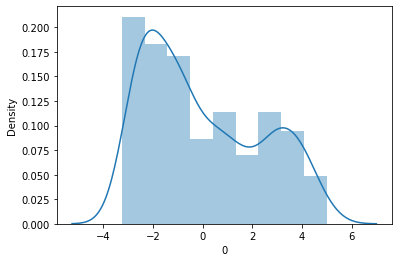


Plot density v/s feature 1



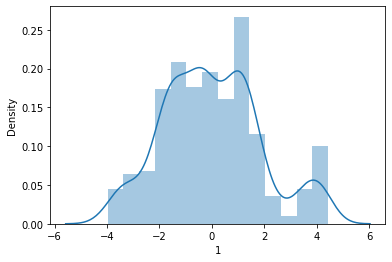


Plot density v/s feature 2



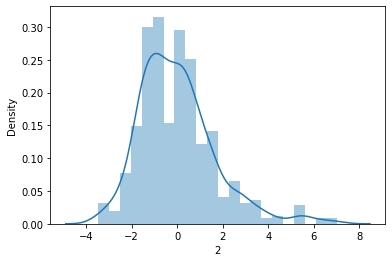


Plot density v/s feature 3



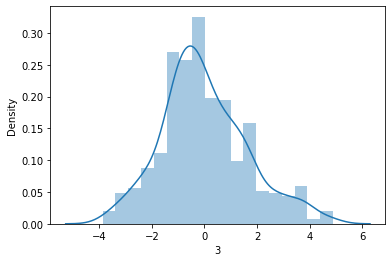


Plot density v/s feature 4



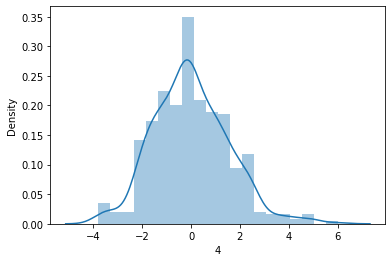


Plot density v/s feature 5



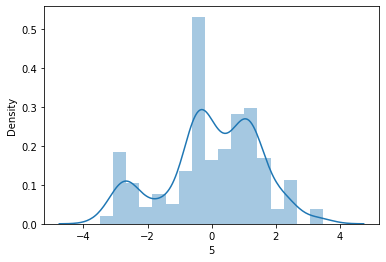


Plot density v/s feature 6



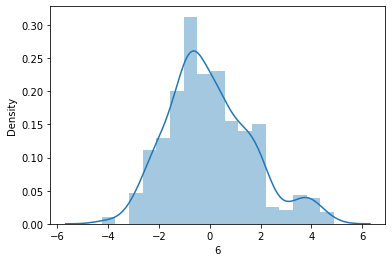


Plot density v/s feature 7



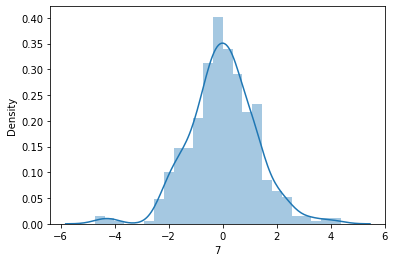


Plot density v/s feature 8



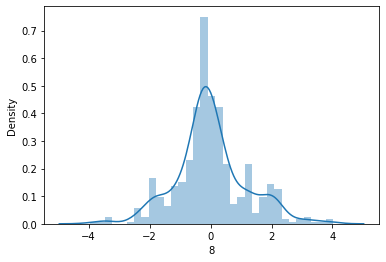


Plot density v/s feature 9



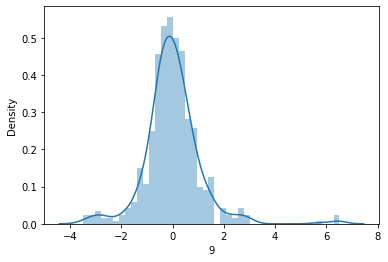


Plot density v/s feature 10



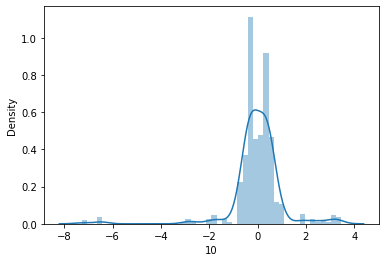


Plot density v/s feature 11



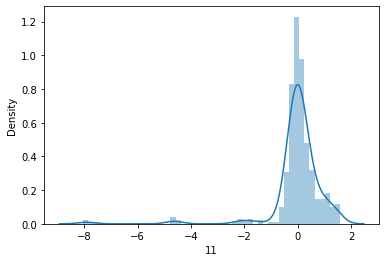


Plot density v/s feature 12



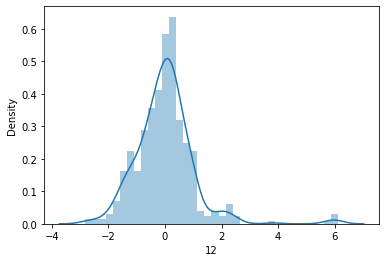


Plot density v/s feature 13



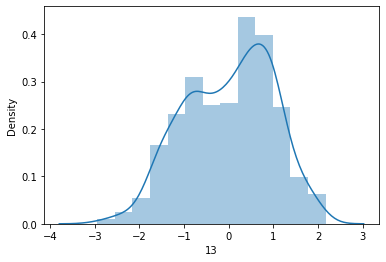


Plot density v/s feature 14



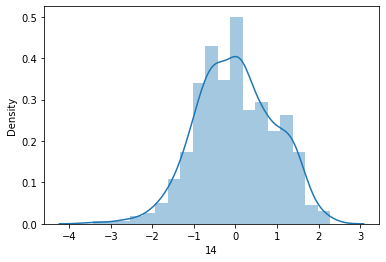


Plot density v/s feature 15



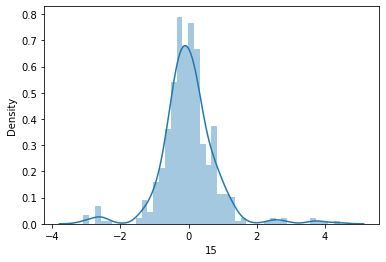


Plot density v/s feature 16



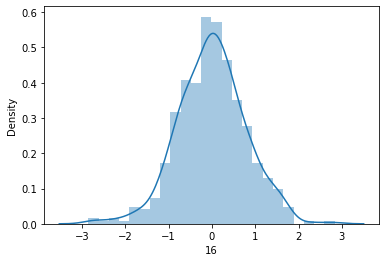

In [62]:
# Plotting the distribution of columns of dataset after implementing PCA.

for i in X_train_pca.columns:
    if(X_train_pca[i].dtype != 'object'):
        print(f"\nPlot density v/s feature {i}\n")
        sns.distplot(X_train_pca[i])
        plt.show()

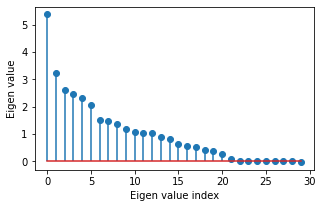

In [63]:
plt.figure(figsize=(5,3))
plt.stem(eigen_vals[:31], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [64]:
for i in range(31):
    exp_var = np.sum(eigen_vals[:i+1])*100 / np.sum(eigen_vals)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 17.243916344023116 % variance
Eigenvectors upto 2 expresses 27.638459509246754 % variance
Eigenvectors upto 3 expresses 35.993207492624535 % variance
Eigenvectors upto 4 expresses 43.830841471442106 % variance
Eigenvectors upto 5 expresses 51.206137054873764 % variance
Eigenvectors upto 6 expresses 57.74679219975645 % variance
Eigenvectors upto 7 expresses 62.5975012718812 % variance
Eigenvectors upto 8 expresses 67.27618132500184 % variance
Eigenvectors upto 9 expresses 71.62461897236066 % variance
Eigenvectors upto 10 expresses 75.40429858116438 % variance
Eigenvectors upto 11 expresses 78.88414858268668 % variance
Eigenvectors upto 12 expresses 82.24710590441327 % variance
Eigenvectors upto 13 expresses 85.51629405104255 % variance
Eigenvectors upto 14 expresses 88.37806252346716 % variance
Eigenvectors upto 15 expresses 90.95456256519016 % variance
Eigenvectors upto 16 expresses 92.94391994524248 % variance
Eigenvectors upto 17 expresses 94.77672522697

#**Question-2**

##**0.** Input the dataset

In [65]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-6/anneal.data', sep=",", header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [66]:
testDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-6/anneal.test', sep = ',', header = None)
testDataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
96,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
97,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
98,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


In [67]:
columnsThatContainsMissingValues = []
index = 0
for i in dataset.columns:
    cnt = 0
    for j in dataset[i]:
        if(j == '?'):
            cnt += 1
    if(cnt >= 600):
        columnsThatContainsMissingValues.append(index)
    index += 1
len(columnsThatContainsMissingValues)

25

In [68]:
columnsThatContainsMissingValues = columnsThatContainsMissingValues+ [1]

In [69]:
dataset.drop(columnsThatContainsMissingValues, axis = 1, inplace = True)
testDataset.drop(columnsThatContainsMissingValues, axis = 1, inplace = True)

In [70]:
dataset

,2,3,4,6,7,8,11,31,32,33,34,36,38
0,A,8,0,S,?,0,G,COIL,0.700,610.0,0,0,3
1,R,0,0,S,2,0,E,COIL,3.200,610.0,0,0,3
2,R,0,0,S,2,0,E,SHEET,0.700,1300.0,762,0,3
3,A,0,60,?,?,0,G,COIL,2.801,385.1,0,0,3
4,A,0,60,?,?,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,A,0,50,?,?,0,G,COIL,1.001,50.0,0,0,3
794,?,0,0,S,1,0,G,SHEET,0.699,1300.0,4880,0,3
795,A,0,0,S,2,0,E,COIL,0.400,609.9,0,0,3
796,A,0,0,S,2,0,G,SHEET,3.200,610.0,4880,0,3


In [71]:
testDataset[38].unique()

array(['3', 'U', '5', '2'], dtype=object)

In [72]:
categoricalData = []
notcategoricalData = []
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categoricalData.append(i)

    else:
        notcategoricalData.append(i)
print(categoricalData)
Label_Encode = LabelEncoder()
for i in categoricalData:
    if(i == 38):
        dataset[i] = Label_Encode.fit_transform(dataset[i])
        testDataset[i] = Label_Encode.fit_transform(testDataset[i])+1
    else:
        dataset[i] = Label_Encode.fit_transform(dataset[i])
        testDataset[i] = Label_Encode.fit_transform(testDataset[i])

[2, 6, 7, 11, 31, 38]


In [73]:
target = 38
x_train = dataset.iloc[:,dataset.columns != target]
y_train = dataset.iloc[:,dataset.columns.get_loc(target)]

In [74]:
x_test = testDataset.iloc[:,testDataset.columns != target]
y_test = testDataset.iloc[:,testDataset.columns.get_loc(target)]

##**1.** Implement Linear Discriminant Analysis from scratch with the following subtasks:-

###**a.** A function for computing within class and between class scatter matrices

In [75]:
classes = sorted(dataset[38].unique())
classes

[0, 1, 2, 3, 4]

In [76]:
mean_vectors = []
for cl in range(len(classes)):
    mean_vectors.append(np.mean(x_train[y_train==cl], axis=0))
    print('Mean Vector class %s:' %(cl))
    print(mean_vectors[cl])
    print(" ")

Mean Vector class 0:
2       4.2500
3       0.3750
4       0.0000
6       0.0000
7       4.0000
8     362.5000
11      0.0000
31      0.0000
32      0.8125
33    485.6125
34      0.0000
36      0.0000
dtype: float64
 
Mean Vector class 1:
2        3.750000
3        0.000000
4        0.000000
6        1.613636
7        1.840909
8      107.954545
11       0.409091
31       0.818182
32       1.330500
33     909.163636
34    1870.056818
36       0.000000
dtype: float64
 
Mean Vector class 2:
2        2.070724
3        4.618421
4       10.962171
6        1.416118
7        2.192434
8       20.098684
11       2.327303
31       0.514803
32       1.147372
33     781.911349
34    1271.105263
36      32.236842
dtype: float64
 
Mean Vector class 3:
2       0.750000
3       0.000000
4       0.000000
6       0.316667
7       1.500000
8       0.000000
11      0.000000
31      0.533333
32      1.013300
33    611.815000
34    908.250000
36      0.000000
dtype: float64
 
Mean Vector class 4:
2       1.0

####Within Class Scatter Matrix

In [77]:
SW = np.zeros((x_train.shape[1], x_train.shape[1]))
for c in classes:
    X_c = x_train[y_train == c]
    mean_c = np.mean(X_c, axis=0)
    SW += (X_c - mean_c).T.dot((X_c - mean_c))

In [78]:
SW.values.tolist()

[[1891.2088815789466,
  731.6578947368412,
  -7856.3733552631575,
  -1.6430921052633742,
  -140.27467105263136,
  13385.756578947381,
  -298.0740131578947,
  20.863486842105303,
  197.8025164473684,
  41203.312006578984,
  45799.47368421056,
  7913.815789473705],
 [731.6578947368412,
  144315.58397832775,
  -32375.89396284827,
  -3944.460526315795,
  5075.644736842094,
  -57524.60526315788,
  -6434.124613003095,
  -1201.8010835913276,
  1769.0459133126938,
  -31259.816369968914,
  -2740708.520123838,
  312273.06501548016],
 [-7856.3733552631575,
  -32375.89396284827,
  304209.18875774014,
  -4668.429276315797,
  12047.42598684211,
  -133957.7302631576,
  2472.057372291024,
  -827.0418924148602,
  -1015.7530388931891,
  -223129.43309790973,
  -2434365.108359132,
  226494.38854489222],
 [-1.6430921052633742,
  -3944.460526315795,
  -4668.429276315797,
  557.569009170654,
  -688.5949461722472,
  -32634.51255980866,
  -75.89847488038278,
  101.43978269537489,
  -82.3867427631579,
  3470.20

####Between Class Scatter Matrix

In [79]:
mean_overall = np.mean(x_train, axis=0)
SB = np.zeros((x_train.shape[1], x_train.shape[1]))
for c in classes:
    X_c = x_train[y_train == c]
    mean_c = np.mean(X_c, axis=0)
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).values.reshape(x_train.shape[1],1)
    SB += n_c * (mean_diff).dot(mean_diff.T)
SB

array([[ 4.26710918e+02, -1.90705514e+02, -3.48392740e+03,
         1.49888706e+02, -3.15799655e+01,  2.07439176e+04,
        -1.58808192e+02,  3.68858866e+01,  6.45568907e+00,
         2.57936857e+04,  1.15593541e+05, -4.50253759e+03],
       [-1.90705514e+02,  2.93810650e+03, -8.83034609e+02,
         3.50793860e+02,  2.93790727e+01, -2.98177757e+04,
         1.05010080e+03, -7.52227259e+01, -8.55931038e+01,
         3.16030656e+02, -2.05929084e+04,  1.24055064e+04],
       [-3.48392740e+03, -8.83034609e+02,  1.78927183e+05,
        -2.56814967e+03,  4.85811913e+03, -1.55280992e+05,
         6.21213436e+03, -5.16397957e+02,  1.43983631e+03,
         1.00776550e+05, -1.55050734e+06,  1.81672905e+05],
       [ 1.49888706e+02,  3.50793860e+02, -2.56814967e+03,
         1.45553798e+02, -6.74752293e+01,  1.10363537e+03,
         5.76002293e+01,  1.75777612e+01, -1.17770116e+01,
         1.50086557e+04,  7.61820287e+04, -1.05986842e+03],
       [-3.15799655e+01,  2.93790727e+01,  4.8581191

###**b.** A function that will automatically select the number of linear discriminants based upon the percentage of variance that needs to be conserved

 Determine SW^-1 * SB

In [80]:
A = np.linalg.inv(SW).dot(SB)

Get eigenvalues and eigenvectors of SW^-1 * SB

In [81]:
eigen_vals, eigen_vecs = np.linalg.eig(A)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

2.9706723552902012
0.8078962675822692
0.539382412328619
0.09063776921759274
2.269122081381673e-16
2.269122081381673e-16
7.095357215544627e-17
7.095357215544627e-17
2.0349588856968898e-17
1.5461877121424395e-17
7.512677355850896e-18
7.512677355850896e-18


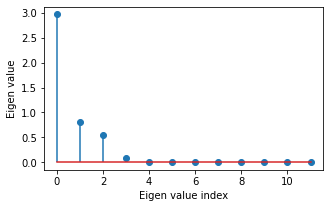

In [82]:
eigen_vals = sorted(eigen_vals, reverse=True)
plt.figure(figsize=(5,3))
plt.stem(eigen_vals[:12], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [83]:
for i in range(12):
    exp_var = (np.sum(eigen_vals[:i+1])*100 / np.sum(eigen_vals)).real
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 67.38374765894991 % variance
Eigenvectors upto 2 expresses 85.70925505879003 % variance
Eigenvectors upto 3 expresses 97.9440638889536 % variance
Eigenvectors upto 4 expresses 100.0 % variance
Eigenvectors upto 5 expresses 100.0 % variance
Eigenvectors upto 6 expresses 100.0 % variance
Eigenvectors upto 7 expresses 100.0 % variance
Eigenvectors upto 8 expresses 100.0 % variance
Eigenvectors upto 9 expresses 100.0 % variance
Eigenvectors upto 10 expresses 100.0 % variance
Eigenvectors upto 11 expresses 100.0 % variance
Eigenvectors upto 12 expresses 100.0 % variance


In [84]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(x_train.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(x_train.shape[1],1))).real
X_train_lda = x_train.dot(W)

In [85]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(x_test.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(x_test.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(x_train.shape[1],1))).real
X_test_lda = x_test.dot(W)

In [86]:
X_test_lda

,0,1,2
0,3.854901,-1.455383,-2.042605
1,3.361238,-2.229274,0.640713
2,2.858151,1.606041,-3.575325
3,2.665716,0.172703,-0.825306
4,3.119155,-1.690998,-0.045805
...,...,...,...
95,2.794626,-2.361465,-1.705409
96,2.818167,-2.346016,-1.728468
97,2.669521,-2.109884,-3.017260
98,3.727163,1.619303,-2.440046


In [87]:
y_test

0     2
1     2
2     4
3     2
4     2
     ..
95    1
96    1
97    1
98    4
99    4
Name: 38, Length: 100, dtype: int64

##**2.** Perform PCA and compare the results with LDA

####Computing the accuracies on classification models for LDA.

In [88]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train_lda,y_train)
Pred = DTC.predict(X_test_lda)
accTestDTCLDA = accuracy_score(y_test, Pred)*100
accTestDTCLDA

99.0

In [89]:
clf = xgb.XGBClassifier()
clf.fit(X_train_lda,y_train)
y_pred = clf.predict(X_test_lda)
accTestXGBLDA = accuracy_score(y_test, y_pred)*100
accTestXGBLDA

100.0

In [90]:
gnb = GaussianNB()
gnb.fit(X_train_lda,y_train)
Pred = gnb.predict(X_test_lda)
accTestGNBLDA = accuracy_score(y_test, Pred)*100
accTestGNBLDA

96.0

##**3.** Identify features having a high impact on classification tasks using both PCA and LDA and visualize the sample space using the first two principal components and first two linear discriminants and comment your observations

####Features that were having a high impact on classification task using PCA

In [91]:
X_train_pca12 = X_train_pca[[0,1]]
X_train_pca12

,0,1
467,2.531692,0.886231
319,-2.019632,-2.016905
328,-0.778079,-1.784574
443,0.472531,-1.639171
493,2.257535,4.090957
...,...,...
71,-0.823213,-1.753055
106,0.640609,3.315232
270,-1.814793,-1.101167
435,-2.797410,0.784950


####Features that were having a high impact on classification task using LDA

In [92]:
X_train_lda12 = X_train_lda[[0,1]]
X_train_lda12

,0,1
0,5.152266,-2.911784
1,3.422658,-1.438281
2,3.431122,-1.812416
3,3.617733,1.315573
4,3.542249,1.006271
...,...,...
793,3.501541,0.496247
794,3.565013,-0.841091
795,3.043893,-1.821132
796,3.948538,-0.876429


####Visualization

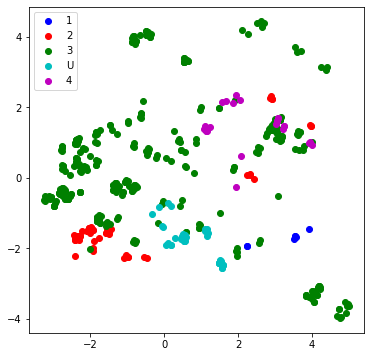

In [93]:
splot = plt.figure(figsize=(6,6))
splot = plt.subplot(1, 1, 1)
splot.scatter(X_train_pca12[y_train_pca==0][[0]], X_train_pca12[y_train_pca==0][[1]], c='b', label='1')
splot.scatter(X_train_pca12[y_train_pca==1][[0]], X_train_pca12[y_train_pca==1][[1]], c='r', label='2')
splot.scatter(X_train_pca12[y_train_pca==2][[0]], X_train_pca12[y_train_pca==2][[1]], c='g', label='3')
splot.scatter(X_train_pca12[y_train_pca==3][[0]], X_train_pca12[y_train_pca==3][[1]], c='c', label='U')
splot.scatter(X_train_pca12[y_train_pca==4][[0]], X_train_pca12[y_train_pca==4][[1]], c='m', label='4')
plt.legend()
plt.show()

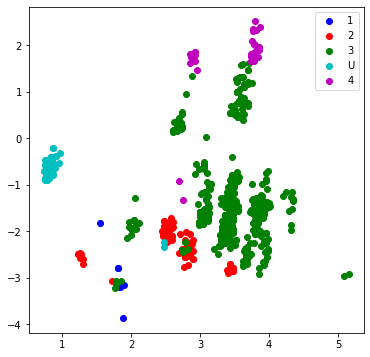

In [94]:
splot = plt.figure(figsize=(6,6))
splot = plt.subplot(1, 1, 1)
splot.scatter(X_train_lda12[y_train==0][[0]], X_train_lda12[y_train==0][[1]], c='b', label='1')
splot.scatter(X_train_lda12[y_train==1][[0]], X_train_lda12[y_train==1][[1]], c='r', label='2')
splot.scatter(X_train_lda12[y_train==2][[0]], X_train_lda12[y_train==2][[1]], c='g', label='3')
splot.scatter(X_train_lda12[y_train==3][[0]], X_train_lda12[y_train==3][[1]], c='c', label='U')
splot.scatter(X_train_lda12[y_train==4][[0]], X_train_lda12[y_train==4][[1]], c='m', label='4')
plt.legend()
plt.show()

##**4.** Using any 2 classification techniques make a 2 * 2 table with column headers as classification techniques used and row headers as feature extraction methods used. The values inside the table should be the accuracy achieved in each case. Compare the results of the table.

In [95]:
featureExtractionMethods = []
featureExtractionMethods.append('PCA')
featureExtractionMethods.append('LDA')

columnClassifierDT = []
columnClassifierDT.append(accAfterPCADT)
columnClassifierDT.append(accTestDTCLDA)

columnClassifierGNB = []
columnClassifierGNB.append(accAfterPCAGNB)
columnClassifierGNB.append(accTestGNBLDA)

Table = pd.DataFrame(list(zip(featureExtractionMethods, columnClassifierDT, columnClassifierGNB)), columns =['Method', 'Decision Tree Classifier', 'Gaussian Naive Bayes Classifier'])

In [96]:
Table

,Method,Decision Tree Classifier,Gaussian Naive Bayes Classifier
0,PCA,95.0,90.0
1,LDA,99.0,96.0


##**5.** Using LDA as a classifier, perform 5-fold cross-validation and plot ROC and compute AUC for each fold from scratch

In [97]:
model = LDA()
model.fit(X_train_lda, y_train)
y_pred_proba = model.predict_proba(X_test_lda)

In [98]:
y_pred_proba_ = []
for i in y_pred_proba:
    L = []
    L.append(i[0] + i[2]/4)
    L.append(i[1] + i[2]/4)
    L.append(i[3] + i[2]/4)
    L.append(i[4] + i[2]/4)
    y_pred_proba_.append(L)

In [99]:
Pred = model.predict(X_test_lda)
accuracy_score(y_test, Pred)*100

95.0

In [100]:
kf = KFold(5)
results = cvs(DTC, X_train_lda, y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.9625     0.98125    0.98125    0.98113208 0.96855346]
97.49371069182389


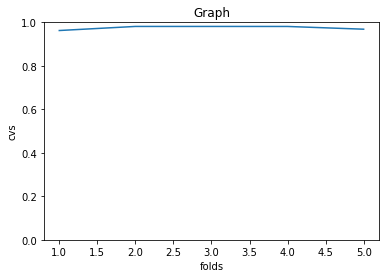

In [101]:
Dict = {}
for i in range(len(results)):
    Dict[i+1] = results[i]
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("folds")
plt.ylabel("cvs")
plt.ylim(0, 1)
plt.show()

In [102]:
roc_auc_score(y_test,y_pred_proba_, multi_class="ovr")

0.7070395800853001